In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import skimage.io
import skimage.segmentation

import os

In [2]:
# TODO change!
in_dir_mask = '/home/jr0th/data/BBBC022/cp_output/mask/'
in_dir_images = '/home/jr0th/data/BBBC022/raw/unzipped/'

In [3]:
# get list of files
list_file = []

# images have same folder and file name, just the ending is different (tif vs png)
list_dir_mask = os.listdir(in_dir_mask)

for dir_mask in list_dir_mask:
    files_in_dir = [dir_mask + '/' + filename for filename in os.listdir(in_dir_mask + dir_mask)]
    list_file = list_file + files_in_dir
    print(len(files_in_dir), len(list_file))

3456 3456
3456 6912
3456 10368
3456 13824
1350 15174
0 15174
0 15174
0 15174
0 15174
0 15174
0 15174
0 15174
0 15174
0 15174
0 15174
0 15174
0 15174
0 15174
0 15174
0 15174


/usr/local/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from uint16 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


uint8


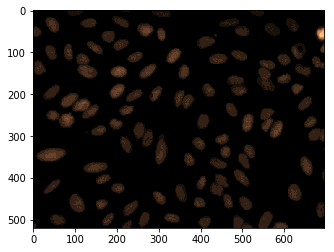

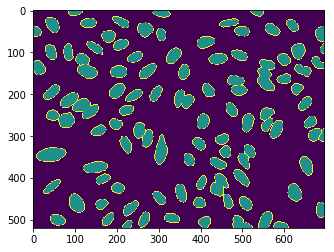

uint8


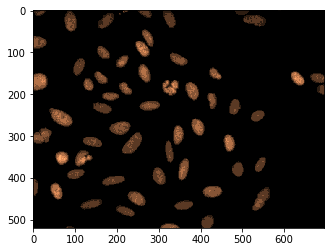

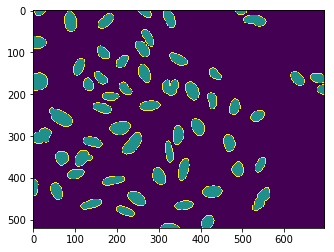

uint8


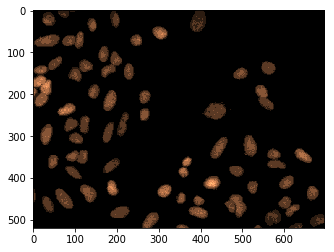

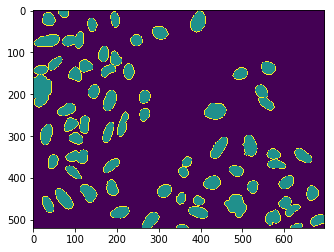

uint8


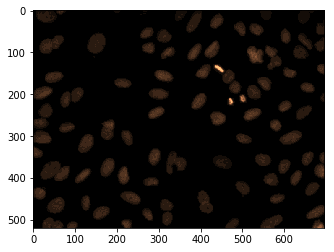

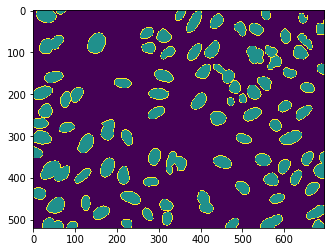

uint8


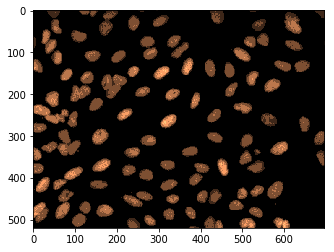

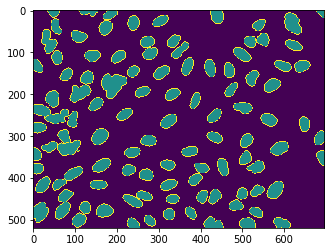

uint8


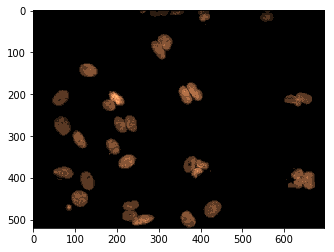

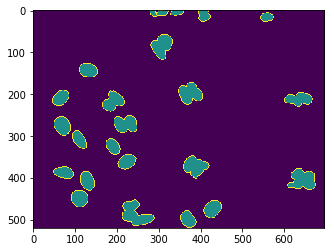

uint8


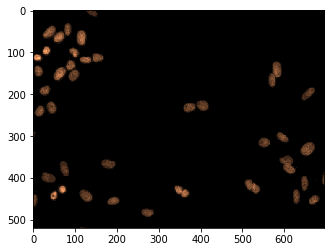

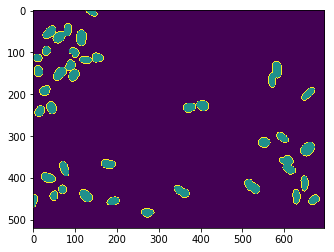

uint8


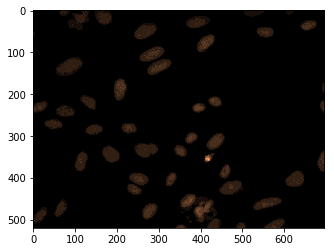

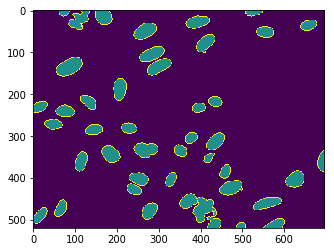

uint8


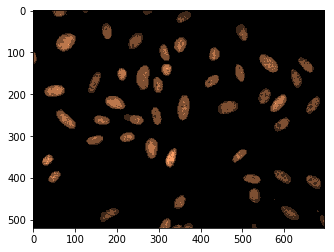

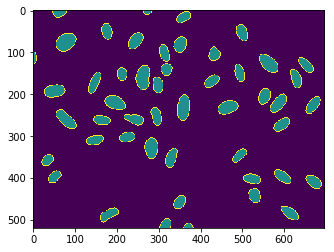

uint8


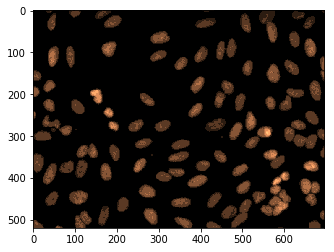

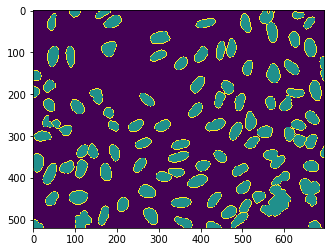

In [9]:
for file in list_file[:10]:

    # get path to file
    folder_file_name = os.path.splitext(file)[0]

    # read image and convert to 8 bit
    img_16 = skimage.io.imread(in_dir_images + folder_file_name + ".tif")
    img = skimage.img_as_ubyte(img_16)
    
    # read labels
    lab = skimage.io.imread(in_dir_mask + folder_file_name + ".png")

    # find boundaries
    boundary = skimage.segmentation.find_boundaries(lab)
    
    labels = np.zeros_like(img)
    labels[lab != 0] = 1
    labels[boundary] = 2
    
    plt.figure()
    plt.imshow(img, cmap="copper")
    plt.show()
    plt.figure()
    plt.imshow(labels)
    plt.show()